In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pylab import style
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

D:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
import tushare as ts
fin_datas = ts.get_hist_data('600031', start='2021-10-11', end='2021-12-31')
fin_datas = fin_datas.reset_index()
fin_datas = fin_datas.sort_values('date',ascending=True)
fin_datas = fin_datas.reset_index()
fin_datas = fin_datas.drop(['index', 'date'], axis = 1)
fin_datas

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
0,26.18,26.38,25.93,25.88,850601.06,-0.23,-0.88,25.614,25.775,26.853,981777.91,1103709.89,1420205.53,1.00
1,25.81,25.90,25.39,25.15,984220.06,-0.54,-2.08,25.620,25.671,26.716,994331.31,1104706.38,1371127.23,1.16
2,25.26,25.58,25.43,25.25,611173.44,0.04,0.16,25.670,25.629,26.525,910566.72,1037763.89,1254026.51,0.72
3,25.44,25.76,25.62,25.38,674322.38,0.19,0.75,25.706,25.557,26.350,864613.69,987223.76,1196098.50,0.79
4,25.65,25.69,25.27,25.20,719281.44,-0.35,-1.37,25.528,25.496,26.198,767919.68,957831.81,1139041.74,0.85
5,25.28,25.30,24.82,24.56,1108911.00,-0.45,-1.78,25.306,25.460,26.024,819581.66,900679.79,1123006.44,1.31
6,24.70,25.36,25.01,24.61,1052836.25,0.19,0.77,25.230,25.425,25.859,833304.90,913818.11,1102494.43,1.24
7,25.00,25.24,24.80,24.70,899870.94,-0.21,-0.84,25.104,25.387,25.723,891044.40,900805.56,1065046.58,1.06
8,24.75,24.85,24.56,24.46,1042759.81,-0.24,-0.97,24.892,25.299,25.601,964731.89,914672.79,1050692.60,1.23
9,24.42,25.50,25.16,24.42,1446452.25,0.60,2.44,24.870,25.199,25.530,1110166.05,939042.86,1047912.33,1.70


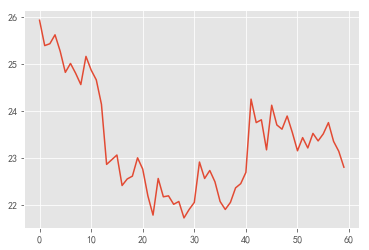

In [3]:
seq = fin_datas['close'].tolist()
seqs = pd.DataFrame(seq)
seqs.columns = ['seq']
style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(seqs)
plt.show()

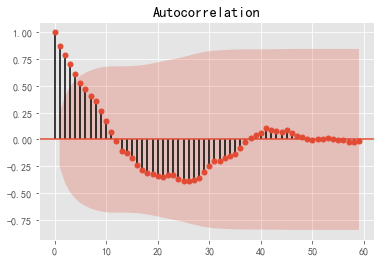

In [4]:
plot_acf(seqs).show()

In [5]:
print(u'原始序列的ADF结果：',ADF(seqs['seq']))

原始序列的ADF结果： (-2.4927227600193764, 0.11725501126974752, 0, 59, {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}, 58.29240270880685)


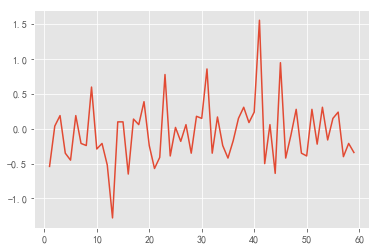

In [6]:
seqs_d = seqs.diff().dropna()
seqs_d.columns=['seq_d']
plt.plot(seqs_d)
plt.show()

差分序列的ADF结果： (-8.929396761332473, 9.909163613252094e-15, 0, 58, {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}, 64.55557604183132)
差分序列的白噪声检验结果： (array([1.72278083]), array([0.18933548]))


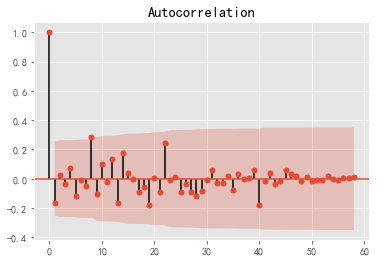

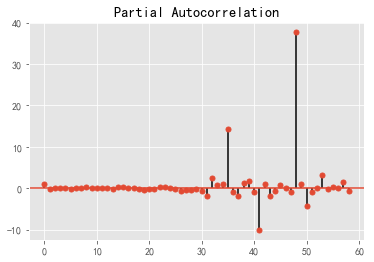

In [7]:
plot_acf(seqs_d).show()
plot_pacf(seqs_d).show()
print(u'差分序列的ADF结果：',ADF(seqs_d['seq_d']))
print(u'差分序列的白噪声检验结果：', acorr_ljungbox(seqs_d, lags=1))

In [8]:
seqs['seq'] = seqs['seq'].astype(float)
pmax = int(len(seqs_d) / 10)
qmax = int(len(seqs_d) / 10)
bic_matrix = []
for p in range(pmax + 1):
    tmp = []
    for q in range(qmax + 1):
        try:
            tmp.append(ARIMA(seqs, (p, 1, q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)

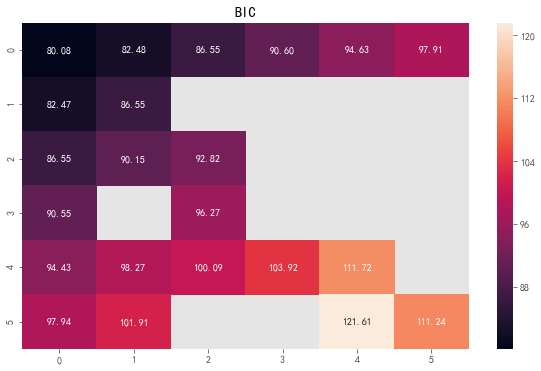

BIC最小的p值和q值：0,0


In [9]:
bic_matrix = pd.DataFrame(bic_matrix)
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.heatmap(bic_matrix, mask = bic_matrix.isnull(), ax = ax, annot = True, fmt = '.2f')
ax.set_title('BIC')
plt.show()
p,q = bic_matrix.stack().idxmin()
print(u'BIC最小的p值和q值：%s,%s'%(p,q))

In [10]:
forecastnum = 5
model = ARIMA(seqs, (p,1,q)).fit()
summary = model.summary()
forecast = model.forecast(forecastnum)
print(summary)
print(forecast)

                             ARIMA Model Results                              
Dep. Variable:                  D.seq   No. Observations:                   59
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -35.960
Method:                           css   S.D. of innovations              0.445
Date:                Fri, 22 Apr 2022   AIC                             75.921
Time:                        00:04:58   BIC                             80.076
Sample:                             1   HQIC                            77.543
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0531      0.058     -0.915      0.364      -0.167       0.061
(array([22.74694915, 22.69389831, 22.64084746, 22.58779661, 22.53474576]), array([0.44510617, 0.62947519, 0.77094651, 0.89021235, 0

In [11]:
pred = [22.74694915, 22.69389831, 22.64084746, 22.58779661, 22.53474576]
new_seq = pd.DataFrame(pred)
new_seq.columns = ['seq']
seqs = seqs.append(new_seq)
seqs = seqs.reset_index()
seqs = seqs.drop(['index'], axis = 1)
seqs.tail()

,seq
60,22.746949
61,22.693898
62,22.640847
63,22.587797
64,22.534746


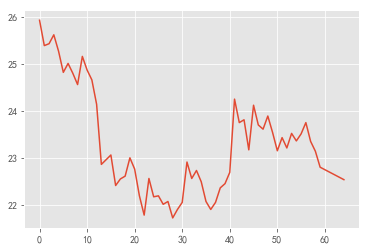

In [12]:
style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(seqs)
plt.show()

In [13]:
MA10 = []
MA5 = []
for day in range(len(seqs['seq'])):
    if day < 4:
        MA5.append(0)
        MA10.append(0)
    elif day < 9:
        MA5.append(seqs.loc[day - 4:day + 1].mean().values[0])
        MA10.append(0)
    else:
        MA5.append(seqs.loc[day - 4:day + 1].mean().values[0])
        MA10.append(seqs.loc[day - 9:day + 1].mean().values[0])
MA = pd.DataFrame()
MA['MA5'] = MA5
MA['MA10'] = MA10
MA.tail()

,MA5,MA10
60,23.080141,23.228259
61,22.895282,23.156518
62,22.768249,23.099954
63,22.667373,23.010385
64,22.640847,22.975424


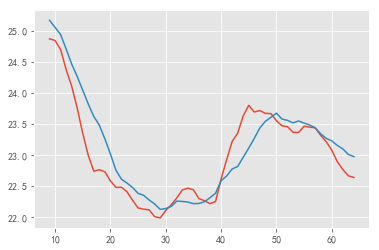

In [14]:
plt.plot(MA.loc[9:])
plt.show()

In [15]:
flag = MA['MA5'] - MA['MA10']
flag = flag.apply(lambda x: 1 if x >= 0 else 0)

fork_gold = []
fork_dead = []
last = flag[10]
for day in range(11, len(flag)):
    if flag[day] != last:
        if flag[day] == 0:
            fork_dead.append(day)
        else:
            fork_gold.append(day)
        last = flag[day]
print('金叉点: ', fork_gold)
print('死叉点: ', fork_dead)

金叉点:  [31, 40]
死叉点:  [38, 50]


In [16]:
fin_datas = ts.get_hist_data('600031', start='2021-10-11', end='2022-01-10')
fin_datas = fin_datas.reset_index()
fin_datas = fin_datas.sort_values('date',ascending=True)
fin_datas = fin_datas.reset_index()
fin_datas = fin_datas.drop(['index', 'date'], axis = 1)
fin_datas

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
0,26.18,26.38,25.93,25.88,850601.06,-0.23,-0.88,25.614,25.775,26.853,981777.91,1103709.89,1420205.53,1.00
1,25.81,25.90,25.39,25.15,984220.06,-0.54,-2.08,25.620,25.671,26.716,994331.31,1104706.38,1371127.23,1.16
2,25.26,25.58,25.43,25.25,611173.44,0.04,0.16,25.670,25.629,26.525,910566.72,1037763.89,1254026.51,0.72
3,25.44,25.76,25.62,25.38,674322.38,0.19,0.75,25.706,25.557,26.350,864613.69,987223.76,1196098.50,0.79
4,25.65,25.69,25.27,25.20,719281.44,-0.35,-1.37,25.528,25.496,26.198,767919.68,957831.81,1139041.74,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,22.79,22.89,22.80,22.52,770091.19,0.00,0.00,23.168,23.287,23.493,811271.89,787512.48,1345408.10,0.91
61,22.81,23.29,23.08,22.66,1275573.62,0.28,1.23,23.034,23.252,23.435,888973.11,845500.99,1211791.49,1.50
62,22.91,24.10,23.85,22.86,2285160.50,0.77,3.34,23.134,23.316,23.440,1210362.06,1008600.68,1194414.82,2.69
63,23.77,25.11,24.81,23.75,3204665.75,0.96,4.03,23.468,23.445,23.490,1702515.55,1227597.26,1262811.65,3.77


In [17]:
price = fin_datas['close'].tolist()
earn = price[fork_dead[-1]] - price[fork_gold[0]]
print('对比每股收益: ', earn)

对比每股收益:  0.23999999999999844
